In [8]:

import os
import time
import datetime

import torch 
import torch.nn as nn

import neuralnets_old as neuralnets
import utils as utils

start_file = "best_feb3.pt"
num_classes = 2


# Device configuration
device = 'cpu'
print("Using device:", device)
print("Indexing test examples...")
test_loader = utils.get_kaggle_test_loader()
best_model = neuralnets.KaggleNetSimple(num_classes).to(device)
best_model.load_state_dict(torch.load(start_file))


Using device: cpu
Indexing test examples...


In [9]:
print (best_model)

KaggleNetSimple(
  (layer1): Sequential(
    (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer2): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer3): Sequential(
    (0): Conv2d(96, 96, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (layer4): Sequential(
    (0): Conv2d(96, 192, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer5): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(1, 1))
    (1): ReLU()
  )
  (layer6): Sequential(
    (0): Conv2d(192, 192, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU()
  )
  (fc): Linear(in_features=27648, out_features=2, bias=True)
)


In [10]:
print(best_model.layer1)

Sequential(
  (0): Conv2d(3, 96, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


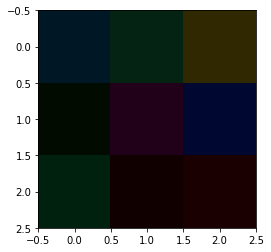

In [11]:
%matplotlib inline

import matplotlib
import numpy as np
import matplotlib.pyplot as plt

conv1 = nn.Conv2d(3, 1, 3)
weight = conv1.weight.data.numpy()
plt.imshow(weight[0, ...])

2592
tensor([[ 0.1457, -0.0685,  0.1531],
        [-0.0034,  0.2087,  0.1509],
        [ 0.1789,  0.0573,  0.0937]])
82944
82944
165888
331776
331776


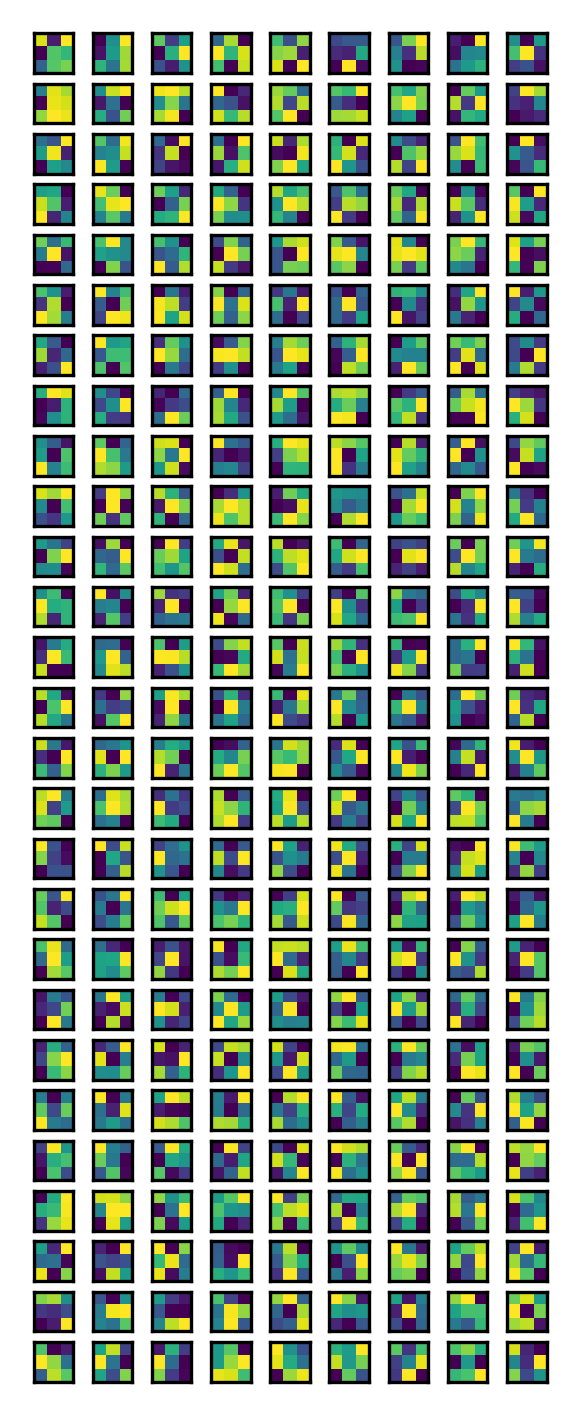

In [72]:
plt.rcParams['figure.dpi']= 300
methods = [None, 'none', 'nearest', 'bilinear', 'bicubic', 'spline16',
           'spline36', 'hanning', 'hamming', 'hermite', 'kaiser', 'quadric',
           'catrom', 'gaussian', 'bessel', 'mitchell', 'sinc', 'lanczos']

plt.rcParams.update({'font.size': 4})

for m in best_model.modules():
    if isinstance(m, nn.Conv2d):
        flat_size = m.weight.data.flatten().size()[0]
        print(flat_size)
        if flat_size == 3*3*3*96: #We are on the first layer. This is the only one this size
            print(m.weight.data[1,1,...])
            grid = np.random.rand(4, 4)

            fig, axs = plt.subplots(nrows=27, ncols=9, figsize=(9, 6),
                        subplot_kw={'xticks': [], 'yticks': []})

            fig.subplots_adjust(left=0.01, right=0.2, hspace=0.0, wspace=0.5)

            for ax, i in zip(axs.flat, range(96*3)):
                ax.imshow(m.weight.data[i%96,int(i/96),...] , cmap='viridis')
                #ax.set_title(str(interp_method))
    
            #ax = plt.gca()
            #ax.grid(color='w', linestyle='-', linewidth=0.5)
        